# 2D Histogrammer

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import glob
import re
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

Kategori
Bukser        77905
T-shirt       75396
Jakke         25501
Skjorte       18147
Sweatshirt    13675
Overall       11763
Andet         10088
Busseron       7255
Forklæde       3360
Kittel         2868
Shorts         2023
Sokker          730
Name: count, dtype: int64


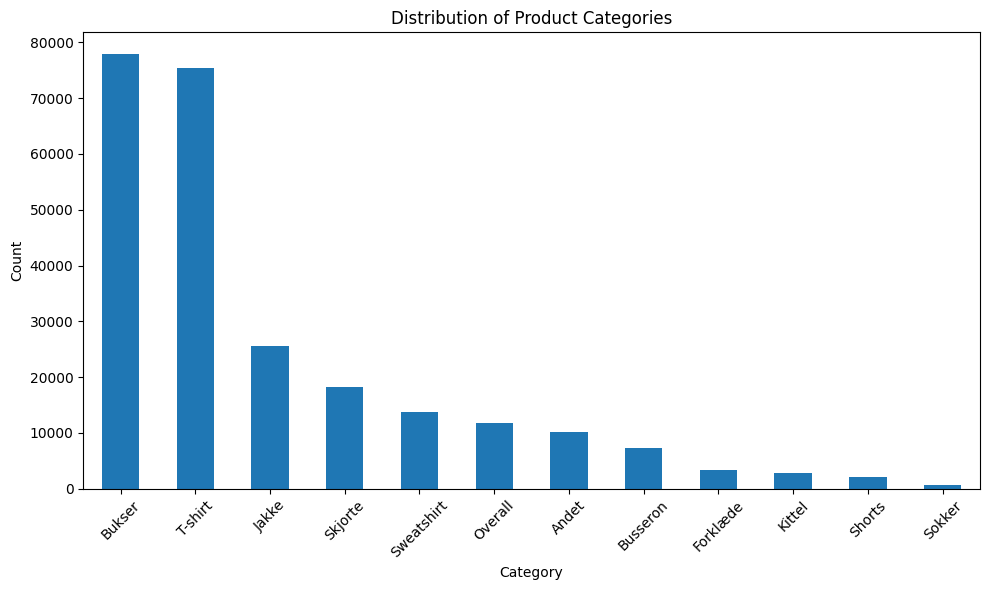

In [3]:
# Find alle Excel-filer i en mappe
filer = glob.glob("/Users/mathias/Desktop/Uni/4. Semester/Dataprojekt/Rådata/2023 AAR vaskeri data/PLC*.xlsx")

# Indlæs alle filer og saml dem i en liste
dataframes = [pd.read_excel(fil, skiprows=2) for fil in filer]

# Eventuelt kombiner alle til én DataFrame
samlet_df = pd.concat(dataframes, ignore_index=True)

def kategoriser_produkt(produktnavn):
    produktnavn = str(produktnavn).lower()
    
    # Tjek i prioriteret rækkefølge (mest specifik først)
    if any(ord in produktnavn for ord in ['forklæde', 'forkl']):
        return 'Forklæde'
    elif 'shorts' in produktnavn:
        return 'Shorts'
    elif any(ord in produktnavn for ord in ['sweat', 'fleece', 'ziptrøje']):
        return 'Sweatshirt'
    elif any(ord in produktnavn for ord in ['t-shirt', 'polo', 'tshirt']):
        return 'T-shirt'
    elif 'kittel' in produktnavn or re.search(r'\bkit[\s\.]', produktnavn):
        return 'Kittel'
    elif any(ord in produktnavn for ord in ['skjorte', 'skj.']):
        return 'Skjorte'
    elif any(ord in produktnavn for ord in ['jakke', 'vest', 'jak', 'jk']):
        return 'Jakke'
    elif any(ord in produktnavn for ord in ['buks', 'benk', 'benklæder', 'unisexben', 'jeans']):
        return 'Bukser'
    elif 'sok' in produktnavn or 'strømpe' in produktnavn:
        return 'Sokker'
    elif 'overall' in produktnavn or 'kedeldr' in produktnavn or 'heldragt' in produktnavn:
        return 'Overall'
    elif any(ord in produktnavn for ord in ['kokkebuss', 'busseron', 'halvbusseron']):
        return 'Busseron'
    else:
        return 'Andet'

# Tilføj kategori
samlet_df['Kategori'] = samlet_df['Produkt - Produkt'].apply(kategoriser_produkt)

# Nu kan du filtrere uden overlap
skjorte_data = samlet_df[samlet_df['Kategori'] == 'Skjorte']
shorts_data = samlet_df[samlet_df['Kategori'] == 'Shorts']
buks_data = samlet_df[samlet_df['Kategori'] == 'Bukser']
tshirt_data = samlet_df[samlet_df['Kategori'] == 'T-shirt']
sweatshirt_data = samlet_df[samlet_df['Kategori'] == 'Sweatshirt']
jakke_data = samlet_df[samlet_df['Kategori'] == 'Jakke']
forklæde_data = samlet_df[samlet_df['Kategori'] == 'Forklæde']
sok_data = samlet_df[samlet_df['Kategori'] == 'Sokker']
kittel_data = samlet_df[samlet_df['Kategori'] == 'Kittel']
busseron_data = samlet_df[samlet_df['Kategori'] == 'Busseron']
andre_data = samlet_df[samlet_df['Kategori'] == 'Andet']

# Tjek resultater
print(samlet_df['Kategori'].value_counts())

# Create a plot to visualize the distribution of categories
plt.figure(figsize=(10, 6))
samlet_df['Kategori'].value_counts().plot(kind='bar')
plt.title('Distribution of Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()